In [2]:
import matplotlib.pyplot as plt
import numpy as np

9
2.4444444444444446


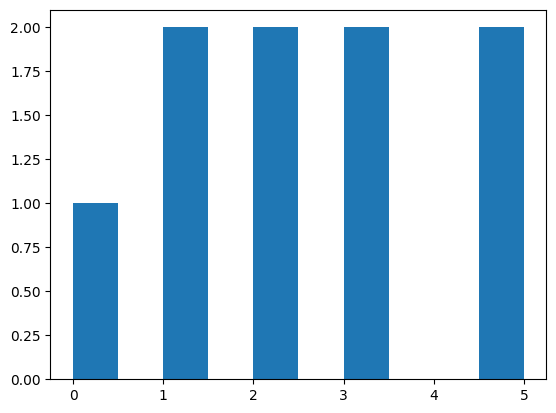

In [3]:
# volatage is 1200 V, Lower PMT, Integral Time of 2 secs, St90
Pcounts = [1,1,5,3,2,0,3,2,5]
print(len(Pcounts))
print(np.mean(Pcounts))
plt.figure()
plt.hist(Pcounts)
plt.show()

In [ ]:
Pcounts = []
print(len(Pcounts))
print(np.mean(Pcounts))